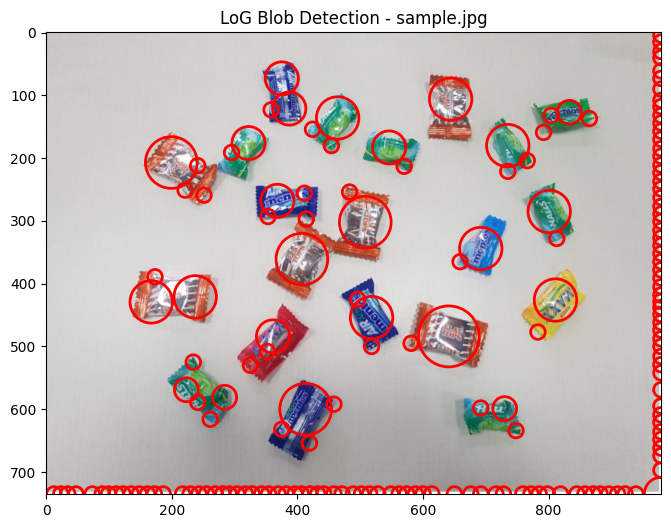

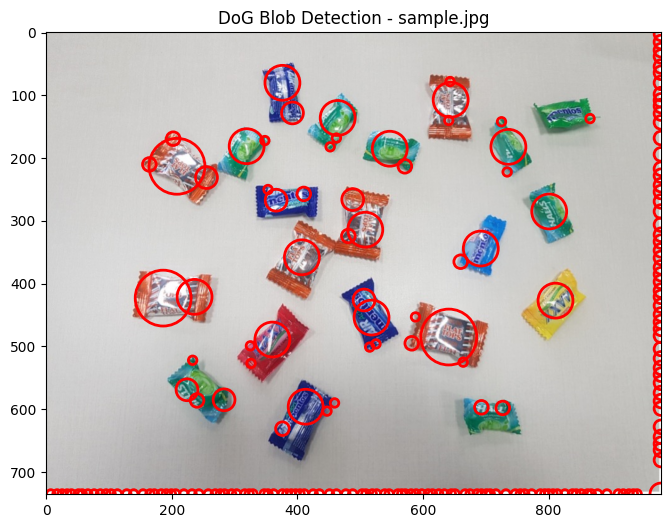

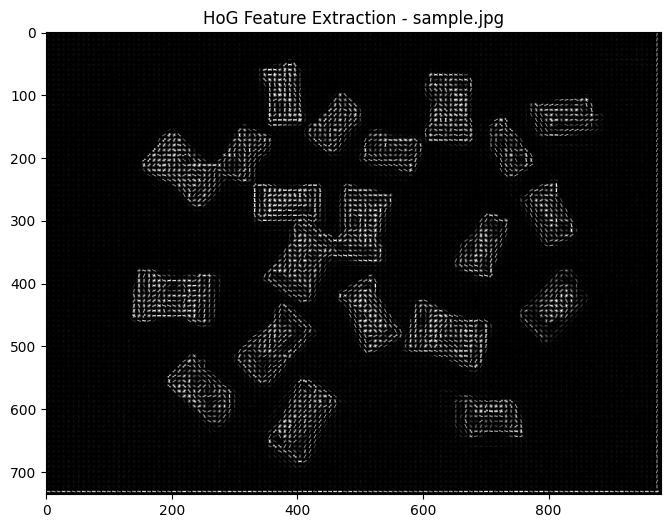

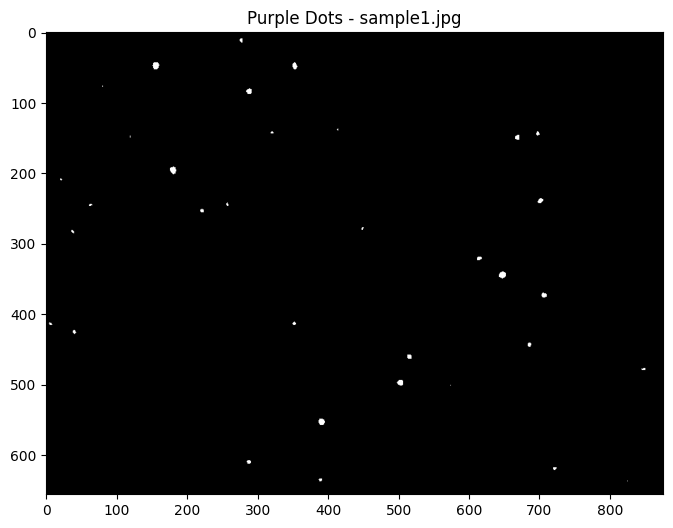

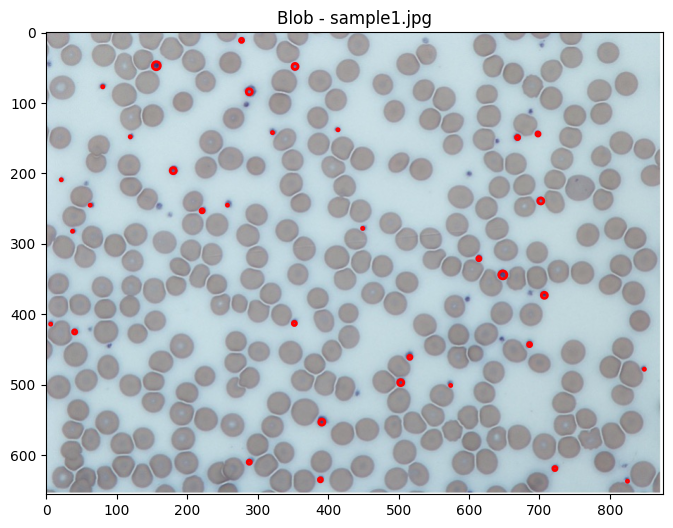

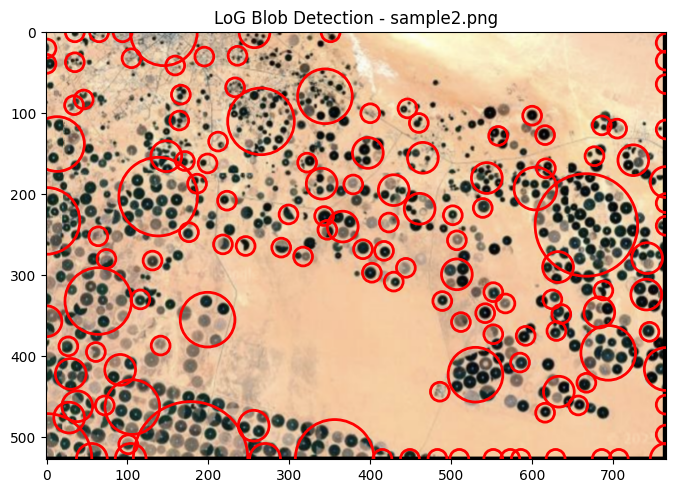

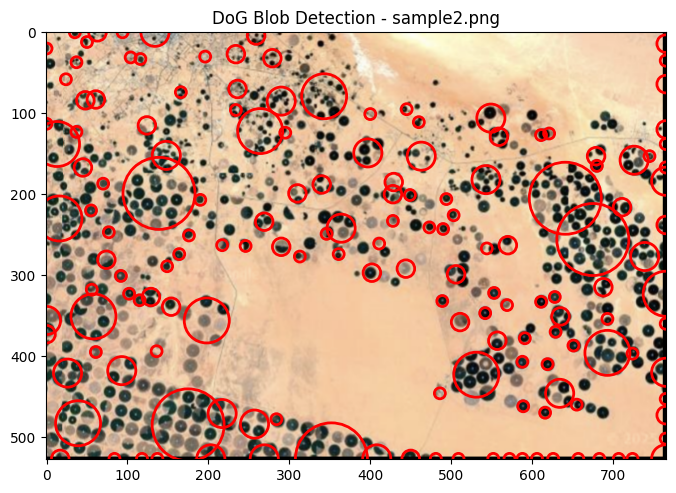

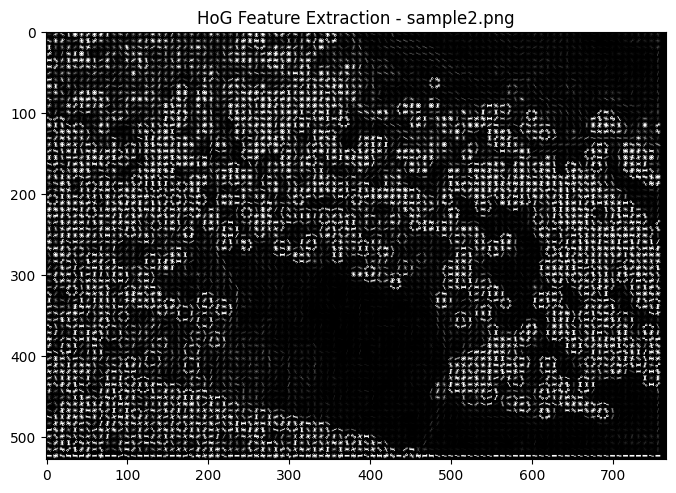

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, hog
from skimage import color, exposure

def load_image(image_path):
    image = cv2.imread(image_path)
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def adaptive_color_texture_filter(image):
    gray = preprocess_image(image)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def log_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_log = blob_log(filtered, min_sigma=3, max_sigma=50, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log

def dog_blob_detection(image):
    filtered = adaptive_color_texture_filter(image)
    blobs_dog = blob_dog(filtered, min_sigma=3, max_sigma=50, threshold=0.02)
    blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)
    return blobs_dog

def detect_purple_dots(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_purple = np.array([120, 50, 50])
    upper_purple = np.array([160, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    blobs_log = blob_log(mask, min_sigma=1, max_sigma=10, num_sigma=10, threshold=0.02)
    blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
    return blobs_log, mask

def hog_feature_extraction(image):
    gray = preprocess_image(image)
    fd, hog_image = hog(gray, orientations=12, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

def display_results(image, blobs, title, min_radius=5, max_radius=80):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for blob in blobs:
        y, x, r = blob
        if min_radius < r < max_radius:
            c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
            ax.add_patch(c)
    ax.set_title(title)
    plt.show()

image_paths = ["sample.jpg", "sample1.jpg", "sample2.png"]

for image_path in image_paths:
    image = load_image(image_path)

    if "sample1.jpg" in image_path:  # Assuming sample1.jpg is the microscope image
        blobs_purple, mask = detect_purple_dots(image)
        plt.figure(figsize=(8,6))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Purple Dots - {image_path}")
        plt.show()
        display_results(image, blobs_purple, f"Blob - {image_path}", min_radius=1, max_radius=8)

    else:
        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}")

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}")

        hog_image = hog_feature_extraction(image)
        plt.figure(figsize=(8,6))
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HoG Feature Extraction - {image_path}")
        plt.show()

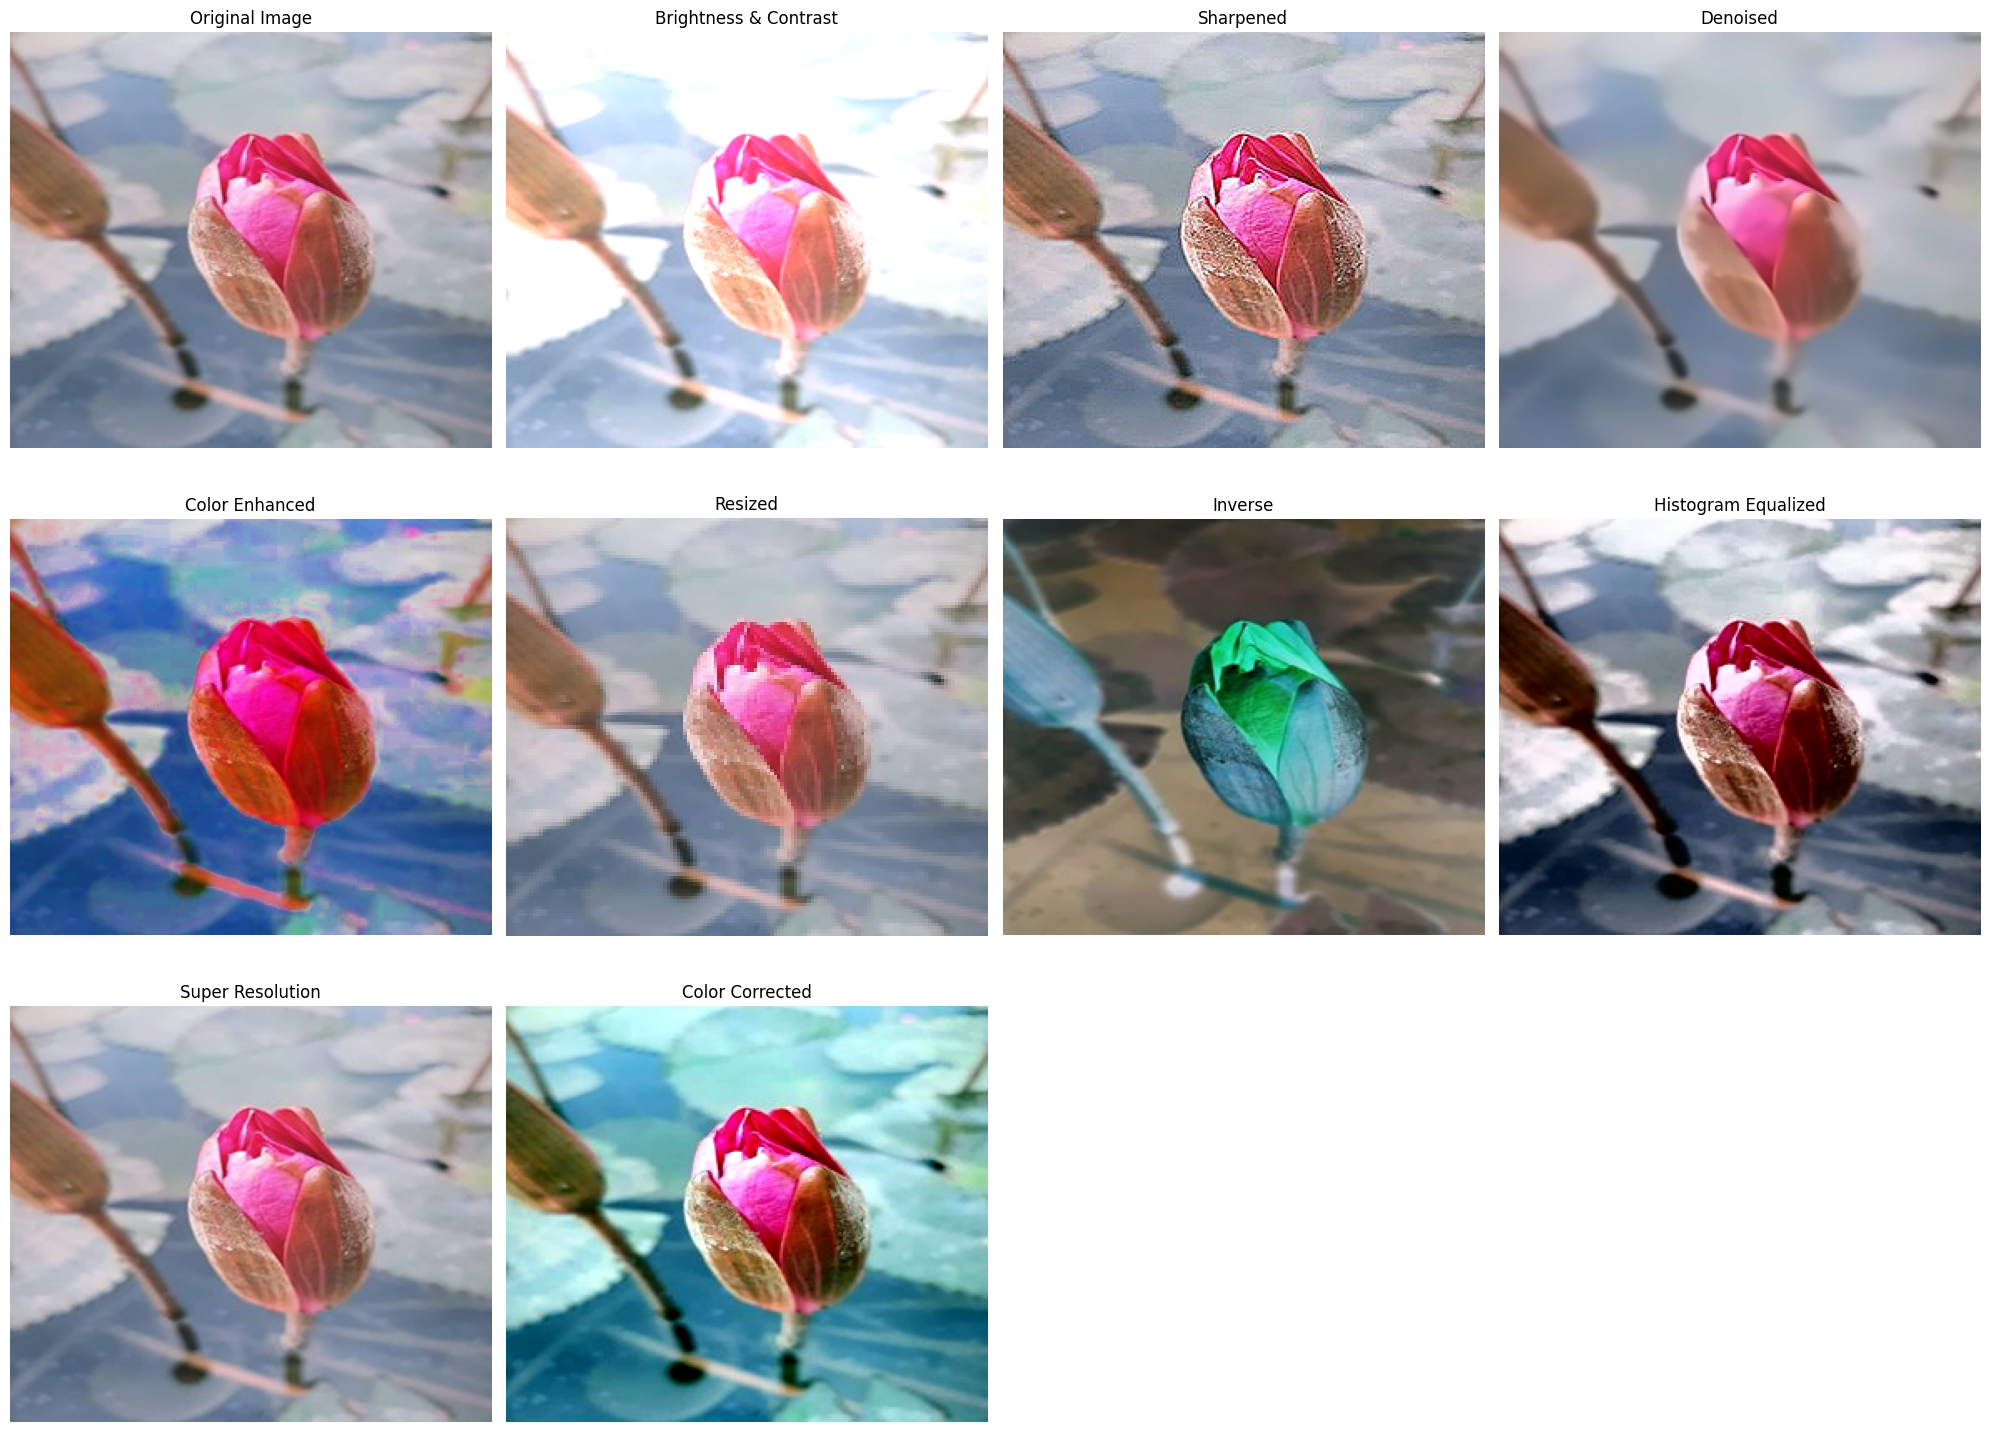

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load Image
image = cv2.imread('/content/i5.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# 1. Adjusting Brightness and Contrast
def adjust_brightness_contrast(img, brightness=30, contrast=30):
    return cv2.convertScaleAbs(img, alpha=1 + contrast / 100, beta=brightness)

# 2. Sharpening Images
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# 3. Removing Noise from Images
def remove_noise(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# 4. Enhancing Color in Images
def enhance_color(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:, :, 1] = cv2.equalizeHist(hsv[:, :, 1])  # Enhance Saturation
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

# 5. Image Resizing and Scaling
def resize_image(img, scale_percent=50):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    return cv2.resize(img, (width, height))

# 6. Inverse Transform (Negative Image)
def inverse_transform(img):
    return cv2.bitwise_not(img)

# 7. Equalizing Histograms
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

# 8. Super Resolution (Upscaling Image using Interpolation)
def super_resolution(img):
    return cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# 9. Color Correction (White Balancing)
def color_correction(img):
    result = cv2.xphoto.createSimpleWB().balanceWhite(img)
    return result

# Apply All Techniques
img_brightness_contrast = adjust_brightness_contrast(image)
img_sharpened = sharpen_image(image)
img_denoised = remove_noise(image)
img_color_enhanced = enhance_color(image)
img_resized = resize_image(image)
img_inverse = inverse_transform(image)
img_hist_equalized = histogram_equalization(image)
img_super_res = super_resolution(image)
img_color_corrected = color_correction(image)

# Plotting the Results
titles = ['Original Image', 'Brightness & Contrast', 'Sharpened', 'Denoised',
          'Color Enhanced', 'Resized', 'Inverse', 'Histogram Equalized', 'Super Resolution', 'Color Corrected']

images = [image, img_brightness_contrast, img_sharpened, img_denoised, img_color_enhanced,
          img_resized, img_inverse, img_hist_equalized, img_super_res, img_color_corrected]

plt.figure(figsize=(20, 15))

for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
for image_path in image_paths:
    image = load_image(image_path)

    if "sample1.jpg" in image_path:  # Assuming sample1.jpg is the microscope image
        blobs_purple, mask = detect_purple_dots(image)
        plt.figure(figsize=(8,6))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Purple Dot Mask - {image_path}")
        plt.show()
        display_results(image, blobs_purple, f"Purple Dot Detection - {image_path}", min_radius=1, max_radius=8)

        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}", min_radius=5, max_radius=8)

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}", min_radius=5, max_radius=8)
    elif "sample2.png" in image_path:  # Assuming sample1.jpg is the microscope image



        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}", min_radius=5, max_radius=8)

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}", min_radius=5, max_radius=8)
    else:
        blobs_log = log_blob_detection(image)
        display_results(image, blobs_log, f"LoG Blob Detection - {image_path}")

        blobs_dog = dog_blob_detection(image)
        display_results(image, blobs_dog, f"DoG Blob Detection - {image_path}")

        hog_image = hog_feature_extraction(image)
        plt.figure(figsize=(8,6))
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HoG Feature Extraction - {image_path}")
        plt.show()

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.27MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.5MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 145MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.4MB/s]


Training AlexNet...
Epoch 1, Loss: 0.5539
AlexNet Training Time: 161.20 seconds
Accuracy: 88.28%
Training VGG16...
Epoch 1, Loss: 0.6490
VGG16 Training Time: 1065.57 seconds
Accuracy: 88.50%


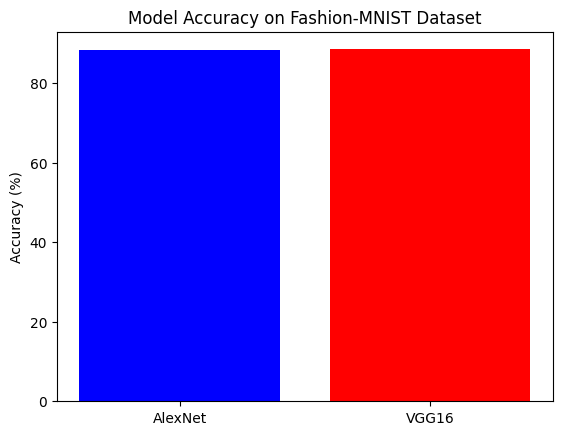

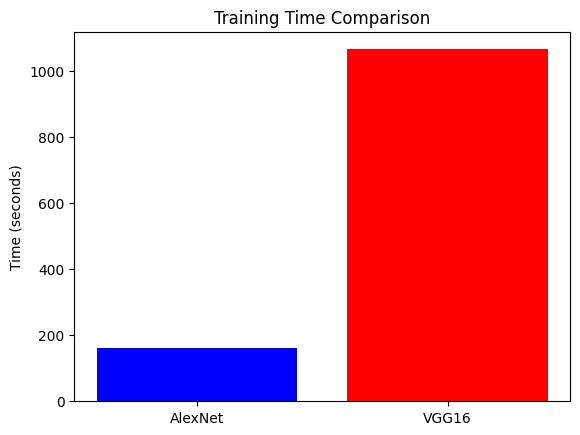

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Task 2: Image Classification on Fashion-MNIST

def get_data_loaders(batch_size=128):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize for AlexNet and VGG16
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
    testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    return trainloader, testloader

# Load Pretrained AlexNet and modify for Fashion-MNIST
def get_alexnet():
    model = torchvision.models.alexnet(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Adjust for 10 classes
    return model

# Load Pretrained VGG16 and modify for Fashion-MNIST
def get_vgg16():
    model = torchvision.models.vgg16(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Adjust for 10 classes
    return model

# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=10, device='cuda'):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f'Loss: {running_loss/len(trainloader):.4f}')
    return model

# Evaluation function
def evaluate_model(model, testloader, device='cuda'):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Performance comparison
def compare_models():
    trainloader, testloader = get_data_loaders()

    models = {'AlexNet': get_alexnet(), 'VGG16': get_vgg16()}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    criterion = nn.CrossEntropyLoss()

    results = {}
    for name, model in models.items():
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        print(f'Training {name}...')
        start_time = time.time()
        trained_model = train_model(model, trainloader, criterion, optimizer, epochs=1, device=device)
        elapsed_time = time.time() - start_time
        print(f'{name} Training Time: {elapsed_time:.2f} seconds')
        accuracy = evaluate_model(trained_model, testloader, device=device)
        results[name] = {'accuracy': accuracy, 'time': elapsed_time}

    # Plot results
    plt.bar(results.keys(), [res['accuracy'] for res in results.values()], color=['blue', 'red'])
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracy on Fashion-MNIST Dataset')
    plt.show()

    plt.bar(results.keys(), [res['time'] for res in results.values()], color=['blue', 'red'])
    plt.ylabel('Time (seconds)')
    plt.title('Training Time Comparison')
    plt.show()

# Run model comparison
compare_models()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST

# Task 2: Image Classification using AlexNet and VGG16 on Fashion-MNIST

# Step 1: Data Preparation
def get_data_loaders(batch_size=128):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize for AlexNet and VGG16
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
    testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    return trainloader, testloader


# Step 2: Load Pretrained AlexNet
def get_alexnet():
    model = torchvision.models.alexnet(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Fashion-MNIST has 10 classes
    return model


# Step 3: Load Pretrained VGG16
def get_vgg16():
    model = torchvision.models.vgg16(pretrained=True)
    model.classifier[6] = nn.Linear(4096, 10)  # Fashion-MNIST has 10 classes
    return model


# Step 4: Training Function
def train_model(model, trainloader, criterion, optimizer, epochs=5, device='cuda'):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}')
    return model


# Step 5: Evaluation Function
def evaluate_model(model, testloader, device='cuda'):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy


# Step 6: Main Execution
def main():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Using device: {device}')

    trainloader, testloader = get_data_loaders()

    # AlexNet
    print("\nTraining AlexNet...")
    alexnet = get_alexnet()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

    start_time = time.time()
    alexnet = train_model(alexnet, trainloader, criterion, optimizer, epochs=5, device=device)
    alexnet_time = time.time() - start_time
    alexnet_acc = evaluate_model(alexnet, testloader, device=device)
    print(f'AlexNet Training + Evaluation Time: {alexnet_time:.2f} seconds')

    # VGG16
    print("\nTraining VGG16...")
    vgg16 = get_vgg16()
    optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

    start_time = time.time()
    vgg16 = train_model(vgg16, trainloader, criterion, optimizer, epochs=5, device=device)
    vgg16_time = time.time() - start_time
    vgg16_acc = evaluate_model(vgg16, testloader, device=device)
    print(f'VGG16 Training + Evaluation Time: {vgg16_time:.2f} seconds')

    # Final Results
    print("\n--- Final Comparison ---")
    print(f'AlexNet Accuracy: {alexnet_acc:.2f}%')
    print(f'VGG16 Accuracy: {vgg16_acc:.2f}%')
    print(f'AlexNet Time: {alexnet_time:.2f} sec')
    print(f'VGG16 Time: {vgg16_time:.2f} sec')


if __name__ == "__main__":
    main()


Using device: cuda

Training AlexNet...
Epoch [1/5], Loss: 0.5045
Epoch [2/5], Loss: 0.3096


KeyboardInterrupt: 